# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [13]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()
#air_bnb.tail()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
#what are we dealing with as far as data is concerned.
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
# 48895 rows total but not all of the rows contain non-null. Is this a significant #of null values? will it sque (prob not spelled rt) are analytsis?

(round(air_bnb.isnull().sum() / air_bnb.shape[0]*100, 2)).sort_values(ascending=False)

#Only last_review and reviews_per_month columns contain a significant amount of null values, but they are not the focus and neither is name and host_name, so we good.


last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

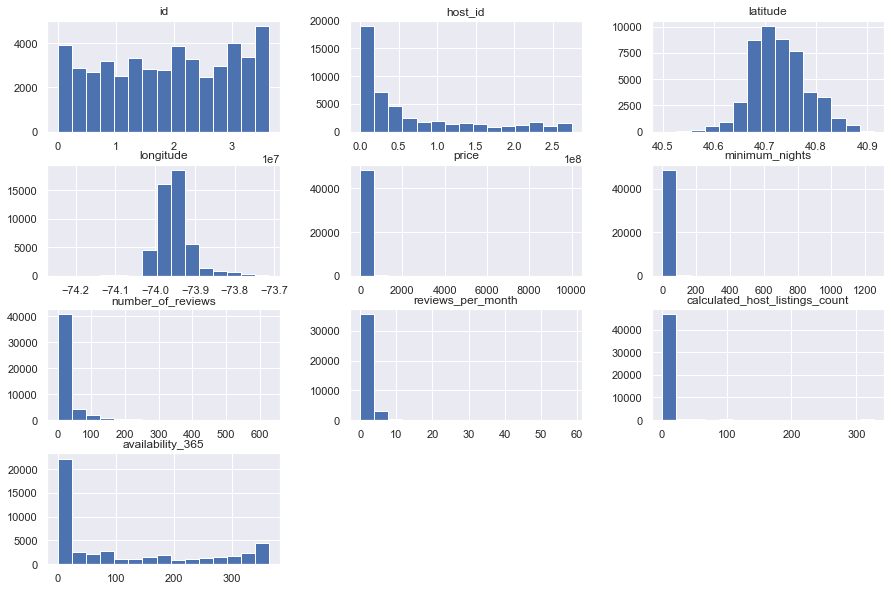

In [16]:
#look for outliers
air_bnb.hist(bins=15, figsize=(15,10));

#price and minimum_nights look poorly distributed. use the described method to get more insight as to why if possible

In [17]:
air_bnb[['price', 'minimum_nights']].describe()
#the min of $0 and max of $10000 in the price column and along w the max of 1250 (might as well buy the place if you're staying that long) in the minimum_nights column is abviously wrong (since 75% of these columns' values are below $175.00 and 5 nights), and will distort our analysis since  
#remove these outliers by finding the % of prices that are 0 and more than 500 along with the % of min_nights over 30 nights

,price,minimum_nights
count,48895.000000,48895.000000
mean,152.720687,7.029962
std,240.154170,20.510550
min,0.000000,1.000000
25%,69.000000,1.000000
50%,106.000000,3.000000
75%,175.000000,5.000000
max,10000.000000,1250.000000


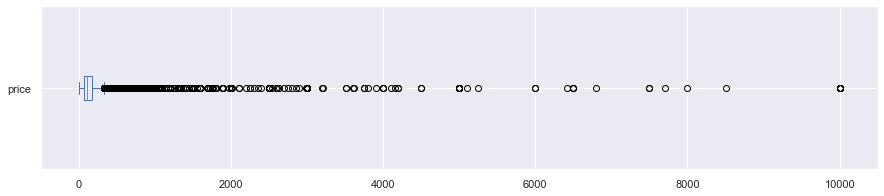

Values over $500.00: 
1044
2.1352%


Values equal to $0: 
11
0.0225%


In [18]:
#the format specifier '{:.4f}'  formats the float number to have 4 decimal places after the decimal point
#len gives you the number of rows where the price is over 500
#use a boxplot to helpo you visualzie how to clean the data up
air_bnb['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to 0 and over 500.00
print('Values over $500.00: ')
print(len(air_bnb[air_bnb['price'] > 500]))
print('{:.4f}%'.format((len(air_bnb[air_bnb['price'] > 500]) / air_bnb.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(air_bnb[air_bnb['price'] == 0]))
print('{:.4f}%'.format((len(air_bnb[air_bnb['price'] == 0]) / air_bnb.shape[0]) * 100))

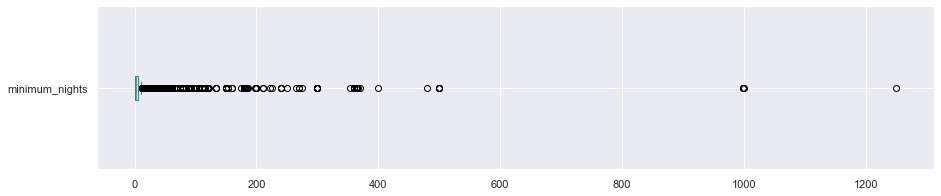

Values over 30 nights: 
747
1.5278%


In [20]:
air_bnb['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(air_bnb[air_bnb['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(air_bnb[air_bnb['minimum_nights'] > 30]) / air_bnb.shape[0]) * 100))#

In [ ]:
# seeing that 2.1352% of the price column is above $500.00 and only 1.5278% of the values in the minimum_nights column is above 30 and considering that 75% of these columns' values are below $175.00 and 5 nights, I feel that losing about 3.7% of the (distorted) data is reasonable to make our analysis more realistic

In [21]:
# How many neighborhood groups are available and which shows up the most?

air_bnb.describe(include = 'all')

air_bnb.groupby('neighbourhood_group').count()




#There are 5 unique neighbour hood groups and Manhattan showsup the most
# air_bnb.shape
# air_bnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,876,1091,1091
Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,16447,20104,20104
Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,16632,21661,21661
Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,4574,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,314,373,373


In [23]:
# Are private rooms the most popular in manhattan?

#get rid of noise
air_bnb.drop(['id','host_id','latitude','longitude','last_review'],axis=1).describe(include='all')

#No, the most popular room_type is Entire Home/apt


#air_bnb

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48879,48874,48895,48895,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
unique,47905,11452,5,221,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,417,21661,3920,25409,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,NaN,NaN,NaN,NaN,NaN,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,NaN,NaN,NaN,NaN,NaN,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000


In [50]:
# Which hosts are the busiest and based on their reviews?

# Group the Airbnb listings by host ID and calculate the count of reviews
grouped = air_bnb.groupby('host_id')['number_of_reviews'].count()

top_hosts_by_reviews = grouped.sort_values(ascending=False).head(5)

print("The top 5 busiest hosts based on their reviews are:")
for host_id in top_hosts_by_reviews.index:
    host_name = air_bnb.loc[air_bnb['host_id'] == host_id, 'host_name'].iloc[0]
    print(f"{host_name}")


The top 5 busiest hosts based on their reviews are:
Sonder (NYC)
Blueground
Kara
Kazuya
Jeremy & Laura


In [27]:
#Which neighorhood group has the highest average price?


# Group the Airbnb listings by neighborhood group and calculate the mean price
grouped = air_bnb.groupby('neighbourhood_group')['price'].mean()

# Sort the groups in descending order based on the mean price and select the first group
highest_avg_price_group = grouped.sort_values(ascending=False).index[0]

print("The neighborhood group with the highest average price is:", highest_avg_price_group)




The neighborhood group with the highest average price is: Manhattan


In [28]:
# Which neighbor hood group has the highest total price?
# Group the Airbnb listings by neighborhood group and calculate the sum of the prices
grouped = air_bnb.groupby('neighbourhood_group')['price'].sum()

highest_total_price_group = grouped.sort_values(ascending=False).index[0]

print("The neighborhood group with the highest total price is:", highest_total_price_group)



The neighborhood group with the highest total price is: Manhattan


In [43]:
#Which top 5 hosts have the highest total price?
# Group the Airbnb listings by host ID and calculate the sum of the prices
grouped = air_bnb.groupby('host_name')['price'].sum()

# Sort the hosts in descending order based on the total price and select the top 5 hosts
top5_hosts = grouped.sort_values(ascending=False).head(5)

print("The top 5 hosts with the highest total price are:")
print(top5_hosts)




The top 5 hosts with the highest total price are:
host_name
Sonder (NYC)    82795
Blueground      70331
Michael         66895
David           65844
Alex            52563
Name: price, dtype: int64


In [47]:
# Who currently has no (zero) availability with a review count of 100 or more?

# Filter the Airbnb listings based on the availability and review count criteria
filtered = air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 400
                                                        )]

# Group the filtered listings by host ID and select the hosts with no availability
grouped = filtered.groupby('host_id')
no_availability_hosts = grouped.filter(lambda x: x['availability_365'].sum() == 0)

# Print the host ID and name of the hosts with no availability
print("Hosts with no availability and review count of 400 or more:")
for host_id in no_availability_hosts['host_id'].unique():
    host_name = air_bnb.loc[air_bnb['host_id'] == host_id, 'host_name'].iloc[0]
    print(f"Host ID: {host_id}, Host Name: {host_name}")


Hosts with no availability and review count of 400 or more:
Host ID: 792159, Host Name: Wanda
Host ID: 22959695, Host Name: Gurpreet  Singh


In [51]:
# What host has the highest total of prices and where are they located?
# Group the Airbnb listings by host ID and calculate the sum of the prices
grouped = air_bnb.groupby('host_id')['price'].sum()

# Sort the hosts in descending order based on the total price and select the host with the highest total price
host_with_highest_price = grouped.sort_values(ascending=False).index[0]

# Retrieve the location (neighbourhood and neighbourhood group) of the selected host
host_location = air_bnb.loc[air_bnb['host_id'] == host_with_highest_price, ['neighbourhood', 'neighbourhood_group']].iloc[0]

# Retrieve the name of the selected host
host_name = air_bnb.loc[air_bnb['host_id'] == host_with_highest_price, 'host_name'].iloc[1]

print(f"The host with the highest total of prices is {host_name}, located in {host_location['neighbourhood']}, {host_location['neighbourhood_group']}.")



The host with the highest total of prices is Sonder (NYC), located in Financial District, Manhattan.


In [54]:
# When did Danielle from Queens last receive a review?

# Filter the Airbnb listings based on the host name and neighbourhood
filtered = air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood'] == 'Queens')]

# Sort the filtered listings by review date in descending order
sorted_reviews = filtered.sort_values('last_review', ascending=False)

if len(sorted_reviews) > 0:
    # Retrieve the date of the last review for the selected host
    last_review_date = sorted_reviews.iloc[0]['last_review']
    print(f"The date of the last review for Danielle's Airbnb listing in Queens is {last_review_date}.")
else:
    print("No matching Airbnb listings found.")




No matching Airbnb listings found.


## Further Questions

1. Which host has the most listings?

In [40]:
# Group the Airbnb listings by host ID and count the number of listings for each host
grouped = air_bnb.groupby('host_id')['id'].count()

# Sort the hosts in descending order based on the number of listings and select the host with the highest count
host_with_most_listings = grouped.sort_values(ascending=False).index[0]

# Retrieve the name of the selected host
host_name = air_bnb.loc[air_bnb['host_id'] == host_with_most_listings, 'host_name'].iloc[0]

print(f"The host with the most listings is {host_name}, with a total of {grouped[host_with_most_listings]} listings.")


The host with the most listings is Sonder (NYC), with a total of 327 listings.


2. How many listings have completely open availability?

In [41]:
# Filter the Airbnb listings based on their availability 365 attribute
completely_open = air_bnb[air_bnb['availability_365'] == 365]

# Count the number of listings that have completely open availability
num_listings = completely_open.shape[0]

print(f"There are {num_listings} listings that have completely open availability.")


There are 1295 listings that have completely open availability.


3. What room_types have the highest review numbers?

In [42]:
# Group the Airbnb listings by room type and sum the number of reviews for each room type
grouped = air_bnb.groupby('room_type')['number_of_reviews'].sum()

# Sort the room types in descending order based on the number of reviews and select the top room types
top_room_types = grouped.sort_values(ascending=False).index[:5]

print("The room types with the highest review numbers are:")

# Print the top room types and their review counts
for room_type in top_room_types:
    reviews = grouped[room_type]
    print(f"- {room_type}: {reviews} reviews")


The room types with the highest review numbers are:
- Entire home/apt: 580403 reviews
- Private room: 538346 reviews
- Shared room: 19256 reviews


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

How many neighborhood groups are available and which shows up the most?
There are 5 unique neighbour hood groups and Manhattan showsup the most

Which neighborhood group has the highest average price?
The neighborhood group with the highest average price is Manhattan.

Which neighborhood group has the highest total price?
Also Manhattan.

Which top 5 hosts have the highest total price?
The top 5 hosts with the highest total price are Sonder (NYC), Blueground, Michael, David, and Alex.  

Which hosts are the busiest and based on their reviews?
The top 5 busiest hosts based on their reviews are:
Sonder (NYC)
Blueground
Kara
Kazuya
Jeremy & Laura

Who currently has no (zero) availability with a review count of 400 or more?
Wanda and Gurpreet  Singh

What host has the highest total of prices and where are they located?
Sonder (NYC), located in Financial District, Manhattan.

When did Danielle from Queens last receive a review? Never. No reviews were found for Danielle from Queens.

Which host has the most listings?
Sonder (NYC), with a total of 327 listings.

How many listings have completely open availability?
There are 1295 listings that have complete open availability.

What room_types have the highest review numbers?
The room types with the highest review numbers are:
- Entire home/apt: 580403 reviews
- Private room: 538346 reviews
- Shared room: 19256 reviews


